In [27]:
#Auto Encoders

input_layer = 784
layer_one = 400
layer_two = 100
layer_three = layer_one
output_layer = input_layer

learning_rate = 0.01

In [28]:
import tensorflow as tf

initializer = tf.contrib.layers.variance_scaling_initializer()
X = tf.placeholder(tf.float32,shape=[None,input_layer])

w1_init = initializer([input_layer,layer_one])
w2_init = initializer([layer_one,layer_two])

w1 = tf.Variable(w1_init,dtype = tf.float32,name = 'weight1')
w2 = tf.Variable(w2_init,dtype = tf.float32,name = 'weight2')
w3 = tf.transpose(w2,name ='weight3')
w4 = tf.transpose(w1,name = 'weight4')

bias1 = tf.Variable(tf.zeros(layer_one),name = 'bias1')
bias2= tf.Variable(tf.zeros(layer_two),name = 'bias2')
bias3= tf.Variable(tf.zeros(layer_three),name = 'bias3')
bias4= tf.Variable(tf.zeros(output_layer),name = 'bias4')

                   
layer_1 = tf.nn.relu(tf.matmul(X,w1) + bias1)
layer_2 = tf.nn.relu(tf.matmul(layer_1,w2) + bias2)
layer_3 = tf.nn.relu(tf.matmul(layer_2,w3) + bias3)
output = tf.matmul(layer_3,w4) + bias4


In [29]:
l2_reg = 0.001
reg = tf.contrib.layers.l2_regularizer(l2_reg)

recon_loss = tf.reduce_mean(tf.square(output-X))

reg_loss = reg(w1) + reg(w2)

loss = reg_loss + recon_loss

optimizer = tf.train.AdadeltaOptimizer(learning_rate)

training_op = optimizer.minimize(loss)



In [30]:
import numpy as np
mnist = tf.contrib.learn.datasets.load_dataset("mnist")


Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [31]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()
epochs = 5

batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(epochs):
        n_batchs = 150
        for i in range(n_batchs):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
        loss_train = recon_loss.eval(feed_dict={X: X_batch})
        print("\r{}".format(epoch), "Train MSE:", loss_train)
        saver.save(sess, "./my_model_all_layers.ckpt")  

0 Train MSE: 0.12655717
1 Train MSE: 0.12008434
2 Train MSE: 0.117893666
3 Train MSE: 0.112243466
4 Train MSE: 0.106426194


In [32]:
import matplotlib.pyplot as plt
def plot_image(image, shape=[28, 28]):
    plt.imshow(image.reshape(shape), cmap="Greys", interpolation="nearest")
    plt.axis("off")
def show_reconstructed_digits(X, outputs, model_path = None, n_test_digits = 2):
    with tf.Session() as sess:
        if model_path:
            saver.restore(sess, model_path)
        X_test = mnist.test.images[:n_test_digits]
        outputs_val = outputs.eval(feed_dict={X: X_test})

    fig = plt.figure(figsize=(8, 3 * n_test_digits))
    for digit_index in range(n_test_digits):
        plt.subplot(n_test_digits, 2, digit_index * 2 + 1)
        plot_image(X_test[digit_index])
        plt.subplot(n_test_digits, 2, digit_index * 2 + 2)
        plot_image(outputs_val[digit_index])
        


INFO:tensorflow:Restoring parameters from ./my_model_all_layers.ckpt


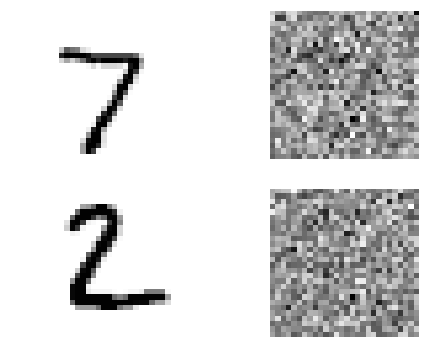

In [33]:
show_reconstructed_digits(X, output, "./my_model_all_layers.ckpt")
